In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

## Reading data

In [2]:
df = pd.read_csv('spotify_all_genres_tracks.csv')

In [3]:
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [4]:
df.drop(['track_id','playlist_url', 'album_cover'], axis = 1, inplace = True)

In [5]:
df.head()

,playlist_name,track_name,track_popularity,artist_name,album,artist_genres,artist_popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,"['blues', 'blues rock', 'chicago blues', 'elec...",41,0.633,0.625,0,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,"['blues', 'blues rock', 'memphis blues', 'mode...",33,0.728,0.054,11,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...","['blues', 'blues rock', 'chicago blues', 'elec...",41,0.705,0.483,1,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,0.745,0.436,5,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,"['blues', 'blues rock', 'chicago blues', 'elec...",42,0.747,0.288,9,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [6]:
df.shape

(9198, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_name      9198 non-null   object 
 1   track_name         9198 non-null   object 
 2   track_popularity   9198 non-null   int64  
 3   artist_name        9198 non-null   object 
 4   album              9198 non-null   object 
 5   artist_genres      9198 non-null   object 
 6   artist_popularity  9198 non-null   int64  
 7   danceability       9198 non-null   float64
 8   energy             9198 non-null   float64
 9   key                9198 non-null   int64  
 10  loudness           9198 non-null   float64
 11  mode               9198 non-null   int64  
 12  speechiness        9198 non-null   float64
 13  acousticness       9198 non-null   float64
 14  instrumentalness   9198 non-null   float64
 15  liveness           9198 non-null   float64
 16  valence            9198 

In [8]:
df.nunique()

playlist_name          58
track_name           8530
track_popularity       95
artist_name          4015
album                7424
artist_genres        3161
artist_popularity      95
danceability          931
energy               1526
key                    12
loudness             7042
mode                    2
speechiness          1061
acousticness         2611
instrumentalness     3131
liveness             1267
valence              1300
tempo                8154
duration_ms          7887
time_signature          5
genre                   8
dtype: int64

In [9]:
df.shape

(9198, 21)

In [10]:
df.duplicated().any()

False

In [11]:
df.isnull().sum()

playlist_name        0
track_name           0
track_popularity     0
artist_name          0
album                0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
genre                0
dtype: int64

**There's no missing values**

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,9198.0,48.891716,17.501544,0.000000,38.000000,49.000000,61.00000,95.000
artist_popularity,9198.0,51.161883,16.080915,0.000000,42.000000,52.000000,62.00000,100.000
danceability,9198.0,0.595363,0.192927,0.000000,0.474000,0.621000,0.74400,0.984
energy,9198.0,0.535862,0.273231,0.000885,0.334000,0.578500,0.75700,0.999
key,9198.0,5.359209,3.558963,0.000000,2.000000,6.000000,8.00000,11.000
loudness,9198.0,-10.706267,6.573201,-47.001000,-13.255750,-8.761500,-6.12825,1.342
mode,9198.0,0.596434,0.490639,0.000000,0.000000,1.000000,1.00000,1.000
speechiness,9198.0,0.084681,0.081614,0.000000,0.038200,0.049000,0.08750,0.827
acousticness,9198.0,0.362225,0.368888,0.000002,0.030425,0.191000,0.73100,0.996
instrumentalness,9198.0,0.227429,0.350817,0.000000,0.000002,0.001675,0.46100,0.983


In [13]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = [col for col in df.columns if col not in cat_cols]

In [97]:
cat_cols

['playlist_name',
 'track_name',
 'artist_name',
 'album',
 'artist_genres',
 'genre']

In [14]:
vcorr = df.corr()

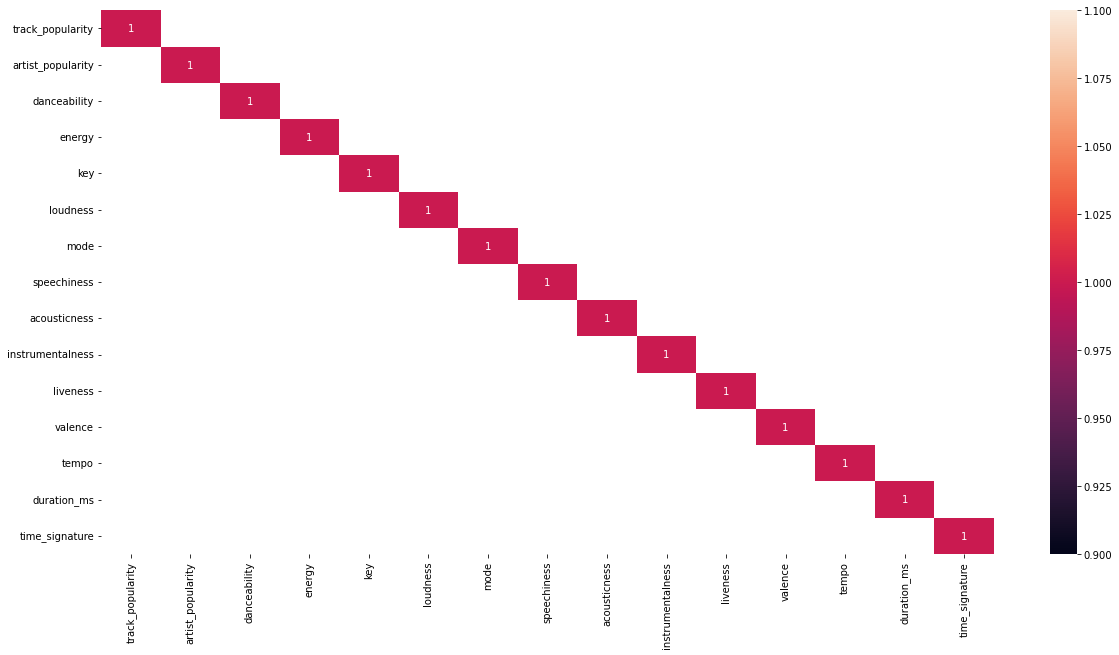

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

**No columns are correlated**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'track_popularity'),
  Text(1, 0, 'artist_popularity'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'key'),
  Text(5, 0, 'loudness'),
  Text(6, 0, 'mode'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'acousticness'),
  Text(9, 0, 'instrumentalness'),
  Text(10, 0, 'liveness'),
  Text(11, 0, 'valence'),
  Text(12, 0, 'tempo'),
  Text(13, 0, 'duration_ms'),
  Text(14, 0, 'time_signature')])

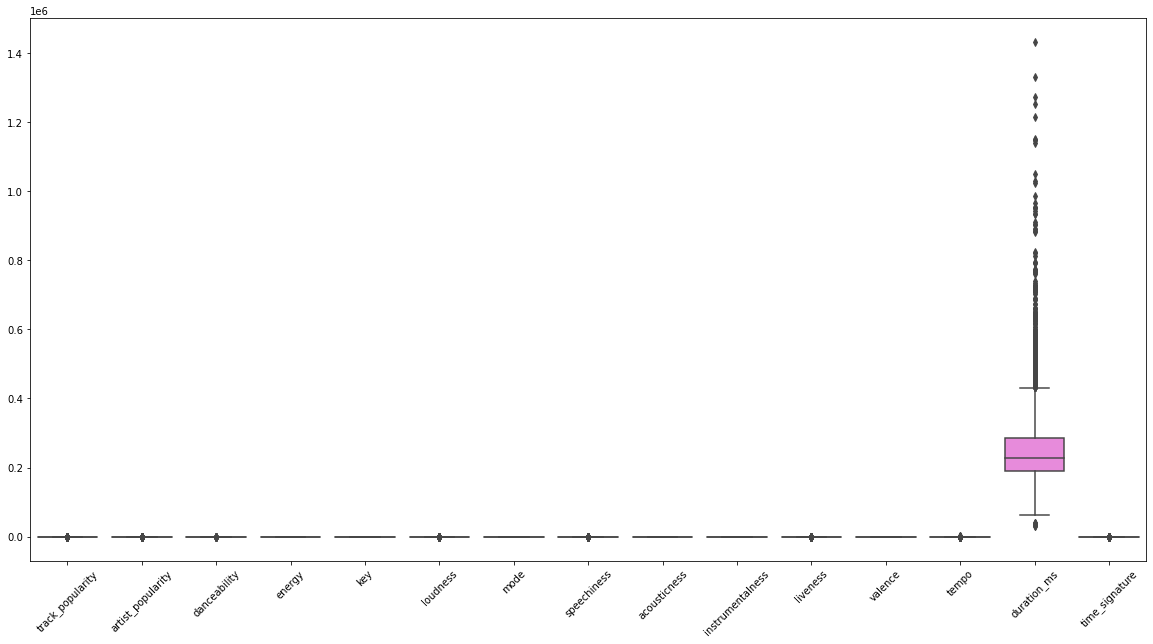

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 45)

**Considering the features of the songs might vary we're not going to treat outliers**

In [17]:
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [18]:
X = df.drop('genre', axis =1)
y = df['genre']

In [19]:
sc = StandardScaler()

In [20]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,playlist_name,track_name,track_popularity,artist_name,album,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.095063,1.606330,0.120469,0.655659,0.130971,-0.159046,-0.631956,0.195095,0.326254,-1.505916,-0.037234,0.822576,-0.503388,0.351820,-0.647128,0.241383,1.271062,-0.452172,-1.034470,0.256395
1,0.095063,-0.028810,-0.622363,-1.085796,-0.065527,-0.137493,-1.129467,0.687536,-1.763665,1.585040,-1.802984,-1.215693,-0.572007,1.485017,-0.511489,-0.359906,-0.293288,-1.317333,0.834092,0.256395
2,0.095063,0.768839,0.006187,-0.060234,-1.218901,-0.162279,-0.631956,0.568313,-0.193481,-1.224920,-0.228628,0.822576,-0.373502,-0.575342,-0.572778,0.227066,0.789723,0.214346,-0.701169,0.256395
3,0.095063,-0.551226,0.577597,1.119293,0.119330,-1.621410,-0.321012,0.775656,-0.365506,-0.100936,0.165722,-1.215693,-0.510740,0.636475,-0.587601,3.147614,1.007830,-0.081090,-0.638266,0.256395
4,0.095063,1.084321,0.120469,-0.202021,0.647359,-0.161201,-0.569767,0.786024,-0.907201,1.023048,-0.567294,0.822576,-0.409037,0.815400,-0.648320,-0.345590,0.236937,-0.179695,-1.078288,0.256395


In [21]:
pca=PCA()

In [22]:
pca_df = pca.fit_transform(df_X_scaled)

In [23]:
pca_df[:2]

array([[-0.57829837,  0.05899093, -1.73768617, -1.35905091, -1.09309188,
        -0.69804772, -0.16633755, -0.25951593, -0.02149881,  0.13153439,
        -0.39352891,  0.41875063,  0.5928084 , -1.38026429, -0.34880413,
         0.20209762, -0.56375078, -0.07083679, -0.44257654,  0.3295987 ],
       [ 2.37690946,  1.06233531,  0.34577534, -0.41159057,  2.30872412,
         0.22588638,  0.28362492, -1.41677343, -0.77137829, -0.05587235,
         0.25213673,  0.30087304, -0.23423946,  0.01775808, -0.48021744,
         1.70520903,  0.52565608,  0.39697352, -0.28227819,  0.45851524]])

In [24]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.22152844 0.31202824 0.37499981 0.43779078 0.49685716 0.55300406
 0.60354553 0.65214008 0.70054249 0.74201944 0.78231714 0.82182769
 0.86040589 0.89709634 0.92580109 0.95347705 0.97188289 0.98530938
 0.99446512 1.        ]


**With 18 columns we can get 95% of variance in data**

In [25]:
spotify_pca_df = pd.DataFrame(pca_df[:,:18])
spotify_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.578298,0.058991,-1.737686,-1.359051,-1.093092,-0.698048,-0.166338,-0.259516,-0.021499,0.131534,-0.393529,0.418751,0.592808,-1.380264,-0.348804,0.202098,-0.563751,-0.070837
1,2.376909,1.062335,0.345775,-0.411591,2.308724,0.225886,0.283625,-1.416773,-0.771378,-0.055872,0.252137,0.300873,-0.234239,0.017758,-0.480217,1.705209,0.525656,0.396974
2,-0.615641,0.281101,0.058774,-1.178900,-1.161910,-0.623752,-0.043727,0.079289,-0.389576,0.245538,-0.064778,0.180131,0.379407,-1.521321,-0.326480,0.259732,0.139691,0.759763
3,-0.805354,-0.298541,-0.214046,-1.136453,-0.084434,1.803653,1.016840,-1.302901,2.179423,0.063581,-1.392195,0.378885,-0.291155,-0.633893,-1.636005,0.676544,0.696278,-0.149827
4,0.366962,0.032598,-1.314649,-1.126100,0.727411,-0.029513,-0.735252,-0.546330,-0.653381,-0.939459,0.834237,0.063539,-0.467918,-0.694578,-0.318439,0.629413,0.540819,0.101839


In [26]:
X_train,X_test,y_train,y_test=train_test_split(spotify_pca_df,y,test_size=0.20,random_state=1234)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7358, 18), (1840, 18), (7358,), (1840,))

## KNN Classifier

In [40]:
k_values = range(3, 23)
list(k_values)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [41]:
test_accuracy={}

In [42]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  test_accuracy[k] = accuracy_score(y_test, knn_pred)

In [43]:
test_accuracy

{3: 0.7119565217391305,
 4: 0.7228260869565217,
 5: 0.7266304347826087,
 6: 0.7326086956521739,
 7: 0.7423913043478261,
 8: 0.7494565217391305,
 9: 0.7467391304347826,
 10: 0.7516304347826087,
 11: 0.75,
 12: 0.7548913043478261,
 13: 0.7510869565217392,
 14: 0.7532608695652174,
 15: 0.7527173913043478,
 16: 0.753804347826087,
 17: 0.7548913043478261,
 18: 0.7510869565217392,
 19: 0.7532608695652174,
 20: 0.7532608695652174,
 21: 0.753804347826087,
 22: 0.7592391304347826}

**We can observe that n = 22 gives best accuracy, therefore we'll build model with 22 n values**

## SVM

In [69]:
parameters = ('linear', 'rbf','poly', 'sigmoid')

In [88]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [89]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

83.96739130434783

In [90]:
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [91]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

82.44565217391305

In [92]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [93]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

79.29347826086956

In [94]:
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [95]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

67.5

**Linear kernel gives better accuracy**

In [110]:
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors = 22),SVC(kernel = 'linear'),
          DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(), AdaBoostClassifier(), GaussianNB()]

In [111]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    
    print('Accuracy score: ',accuracy_score(y_train,y_pred_train))
    print('Accuracy score: ',accuracy_score(y_test,y_pred_test))      

LogisticRegression(max_iter=1000): 
Accuracy score:  0.8027996738244088
Accuracy score:  0.7869565217391304
DecisionTreeClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.6326086956521739
KNeighborsClassifier(n_neighbors=22): 
Accuracy score:  0.7862190812720848
Accuracy score:  0.7592391304347826
SVC(kernel='linear'): 
Accuracy score:  0.8514541995107366
Accuracy score:  0.8396739130434783
DecisionTreeClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.633695652173913
RandomForestClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.7625
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_

In [119]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('confusion_matrix: ', confusion_matrix(y_train,y_pred_train))
    print('confusion_matrix: ', confusion_matrix(y_test,y_pred_test))   

LogisticRegression(max_iter=1000): 
confusion_matrix:  [[ 685    7   23    7   84    2   25    2]
 [  13  695    1    0   76    0    2    2]
 [  12    5 1101   58   48   58   88    6]
 [   5    0   52  595    2   78   91    2]
 [  78   81   36    0  594    1   10    2]
 [   0    0   31   47    5  857   11   57]
 [  39    0   80   86    1   10  570   26]
 [   0    0   19    2    2   77    1  810]]
confusion_matrix:  [[166   2  10   0  12   0   9   0]
 [  2 175   0   0  22   0   1   1]
 [  2   5 282   8  10  20  20   2]
 [  0   0  14 136   1  27  20   1]
 [ 16  26  13   0 138   2   4   1]
 [  0   1   9  11   1 202   1  18]
 [ 12   0  29  23   3   3 149   7]
 [  1   0   5   1   2  14   0 200]]
DecisionTreeClassifier(): 
confusion_matrix:  [[ 835    0    0    0    0    0    0    0]
 [   0  789    0    0    0    0    0    0]
 [   0    0 1376    0    0    0    0    0]
 [   0    0    0  825    0    0    0    0]
 [   0    0    0    0  802    0    0    0]
 [   0    0    0    0    0 1008    0   

In [114]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('classification_report: ',classification_report(y_train,y_pred_train))
    print('classification_report: ',classification_report(y_test,y_pred_test))   

LogisticRegression(max_iter=1000): 
classification_report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82       835
           1       0.88      0.88      0.88       789
           2       0.82      0.80      0.81      1376
           3       0.75      0.72      0.73       825
           4       0.73      0.74      0.74       802
           5       0.79      0.85      0.82      1008
           6       0.71      0.70      0.71       812
           7       0.89      0.89      0.89       911

    accuracy                           0.80      7358
   macro avg       0.80      0.80      0.80      7358
weighted avg       0.80      0.80      0.80      7358

classification_report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83       199
           1       0.84      0.87      0.85       201
           2       0.78      0.81      0.79       349
           3       0.76      0.68      0.72     

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...): 
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       789
           2       1.00      1.00      1.00      1376
           3       1.00      1.00      1.00 

LogisticRegression(max_iter=1000): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183BD6B6070>
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183BD6B6070>
DecisionTreeClassifier(): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183C6559EE0>
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183C6559EE0>
KNeighborsClassifier(n_neighbors=22): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183C69900A0>
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183C69900A0>
SVC(kernel='linear'): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000183C9DB4460>
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at

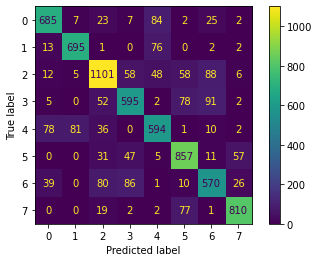

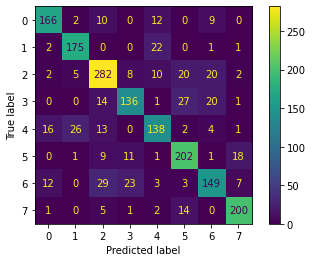

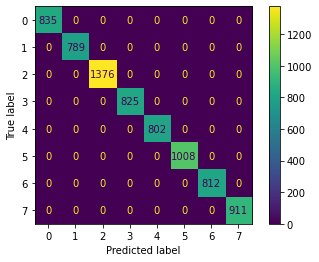

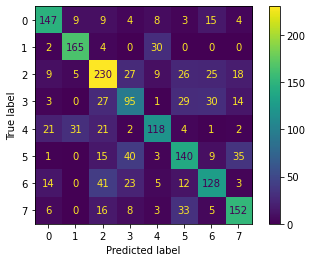

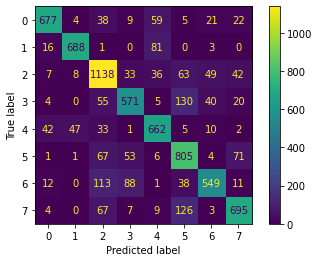

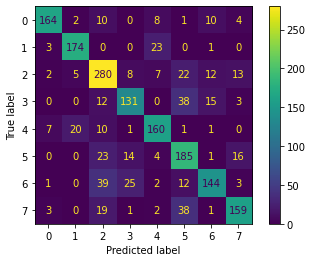

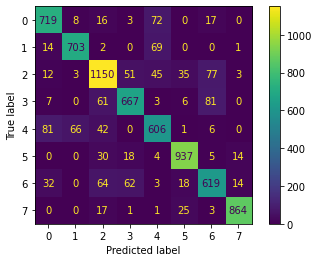

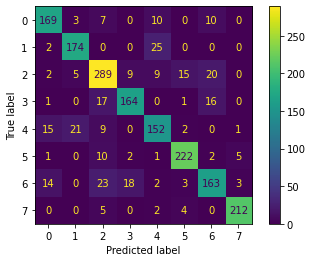

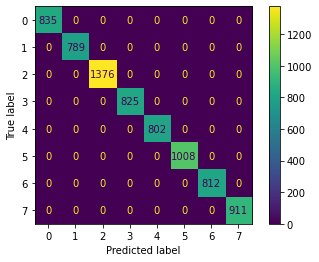

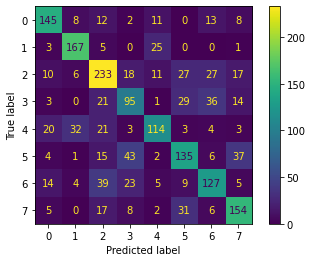

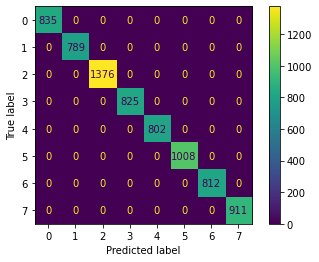

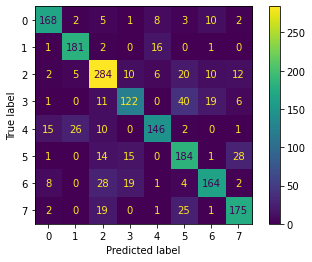

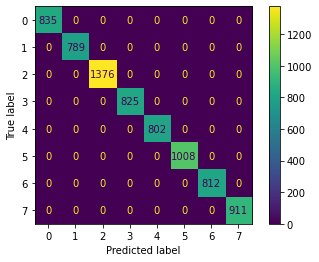

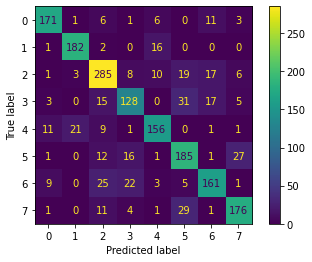

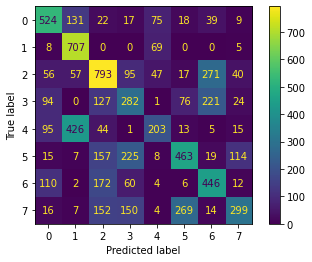

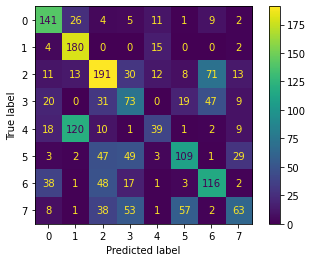

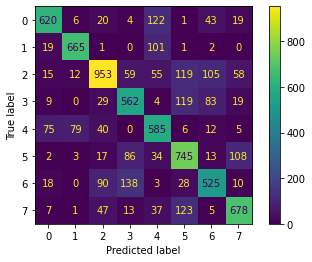

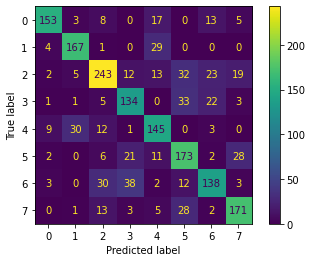

In [120]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train)).plot())
    print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot())